In [50]:
import torchaudio
from pathlib import Path
import seaborn as sns
import numpy as np
from scipy.fft import fft, fftfreq
from scipy import signal

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, LogLocator
%matplotlib inline

## 48kHz Models

In [51]:
sample_rate = 48000
n_fft_value = 128
hop_length_value = n_fft_value // 2
window = np.hanning(n_fft_value)
start = 48000
end = 49000

zoom_spec = sample_rate * 4

In [52]:
def overlap_waveforms(o, t, sample_rate, start, end, title):    

    o_zoom = o[start:end]
    t_zoom = t[start:end]

    # create time vector
    time = range(start, end)

    plt.figure(figsize=(12,3))
    plt.plot(time, o_zoom, alpha=0.8, label="Model")
    plt.plot(time, t_zoom, alpha=0.8, label="Target")
    plt.xlabel("Time (samples)")
    plt.ylabel("Amplitude")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.savefig(f"results/plots/{title}_waves.png")
    plt.show()

def two_spectrograms_difference(o, t, sample_rate, title, zoom=False):

    N = len(o)                   # Number of sample points
    T = 1.0 / sample_rate        # sample spacing

    # Apply Hann window
    windowed_o = o * signal.windows.hann(N)
    windowed_t = t * signal.windows.hann(N)

    o_yf = fft(windowed_o)
    t_yf = fft(windowed_t)
    
    xf = fftfreq(N, 1/sample_rate)[:N//2]

    # Convert magnitude to dB scale
    o_mag_in_db = 20 * np.log10(np.abs(o_yf[:N//2]))
    t_mag_in_db = 20 * np.log10(np.abs(t_yf[:N//2]))

    plt.figure(figsize=(12,4))
    plt.plot(xf, o_mag_in_db, linewidth=0.5, alpha=.6, label="Model")
    plt.plot(xf, t_mag_in_db, linewidth=0.5, alpha=.6, label="Target")
    plt.plot
    plt.grid()
    plt.xlim(20, sample_rate/2)
    plt.ylim(-120, np.max(o_mag_in_db)+10)
    plt.xscale('log')
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.legend()
    
    # Use ScalarFormatter to avoid scientific notation
    ax = plt.gca()
    ax.xaxis.set_major_formatter(ScalarFormatter())
    ax.xaxis.get_major_formatter().set_scientific(False)
    ax.xaxis.get_major_formatter().set_useOffset(False)
    plt.tight_layout()
    plt.savefig(f"results/plots/{title}_spectra.png")
    plt.show()

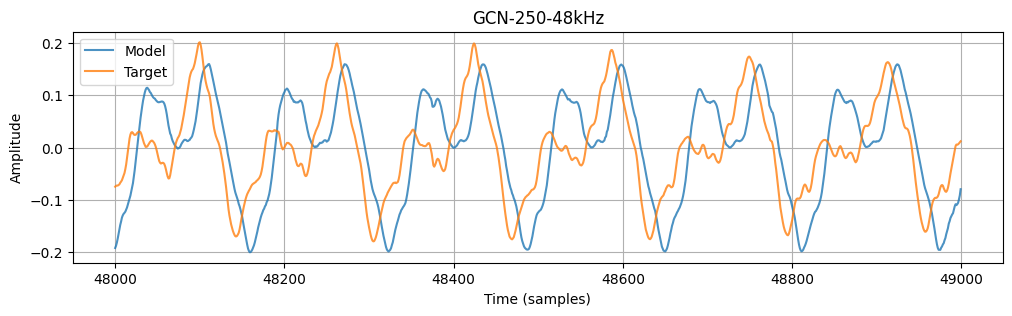

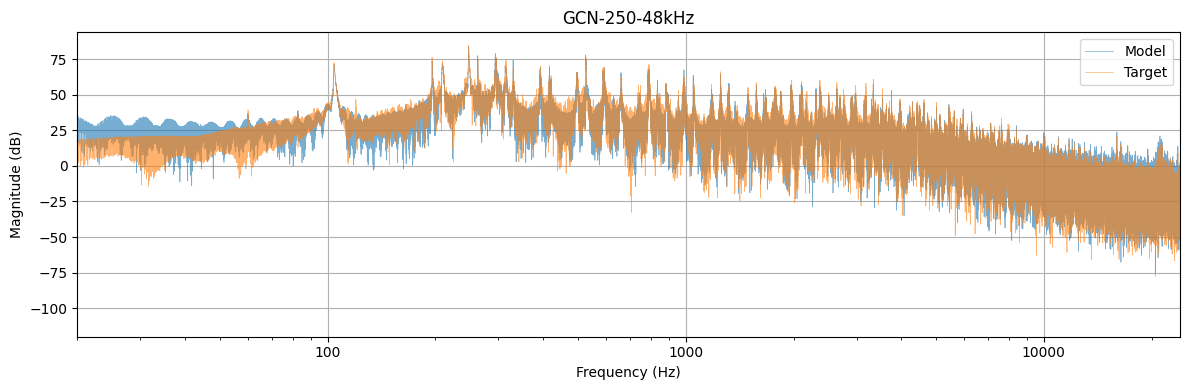

In [53]:
o_p, sample_rate = torchaudio.load("results/48k/test/gcn-250_20230824-224525_20230828_215001/out_gcn-250.wav")
t_p, t_sr = torchaudio.load("results/48k/test/gcn-250_20230824-224525_20230828_215001/tgt_gcn-250.wav")

o = o_p.numpy().squeeze()
t = t_p.numpy().squeeze()

title = "GCN-250-48kHz"

overlap_waveforms(o, t, sample_rate, start, end, title)
two_spectrograms_difference(o, t, sample_rate, title, zoom_spec)

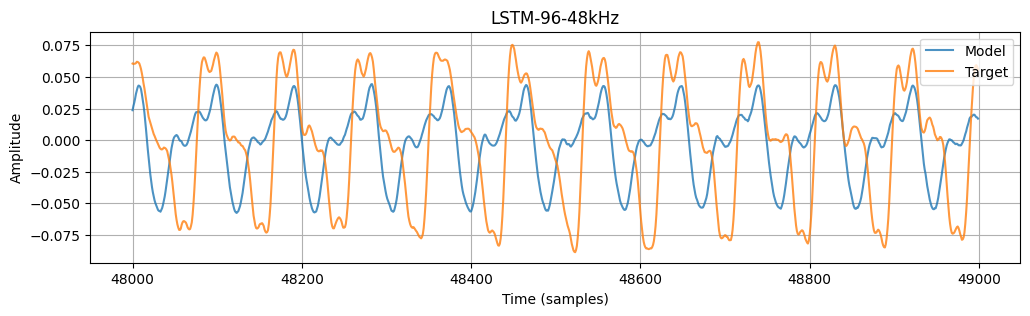

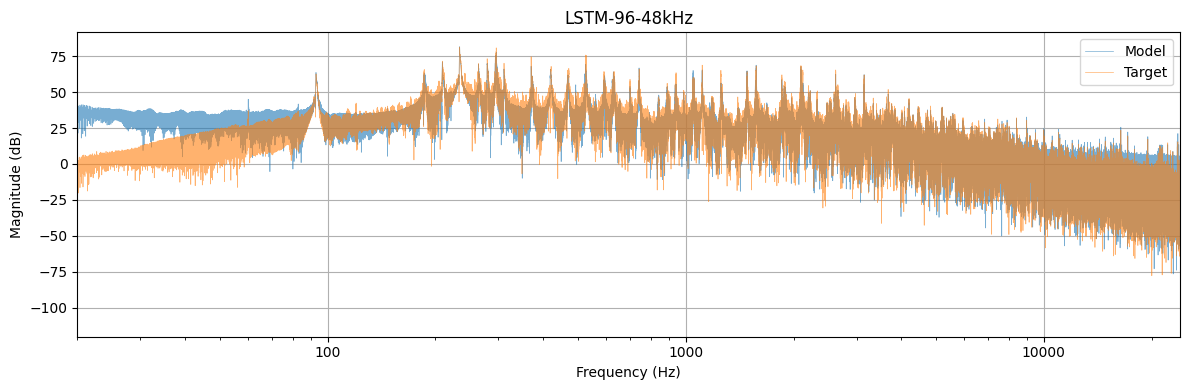

In [54]:
title = "LSTM-96-48kHz"

o_lstm_96_leg, _ = torchaudio.load("results/48k/test/lstm-cs-96_20230825-151911_20230828_220103/out_lstm-cs-96.wav")
t_lstm_96_leg, _ = torchaudio.load("results/48k/test/lstm-cs-96_20230825-151911_20230828_220103/tgt_lstm-cs-96.wav")

o = o_lstm_96_leg.numpy().squeeze()
t = t_lstm_96_leg.numpy().squeeze()

overlap_waveforms(o, t, sample_rate, start, end, title)
two_spectrograms_difference(o, t, sample_rate, title, zoom_spec)

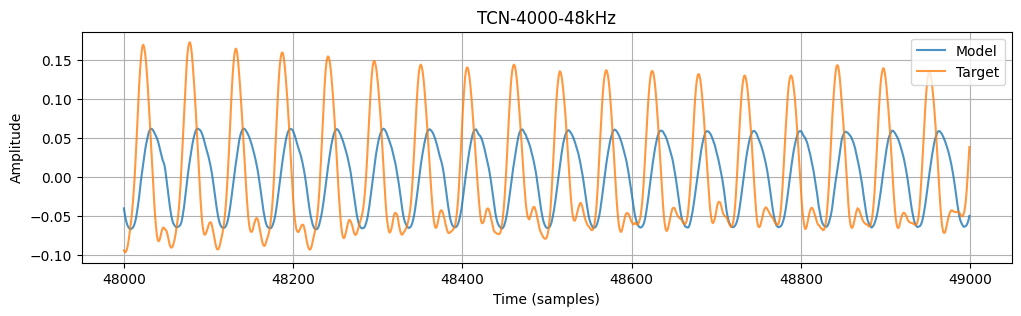

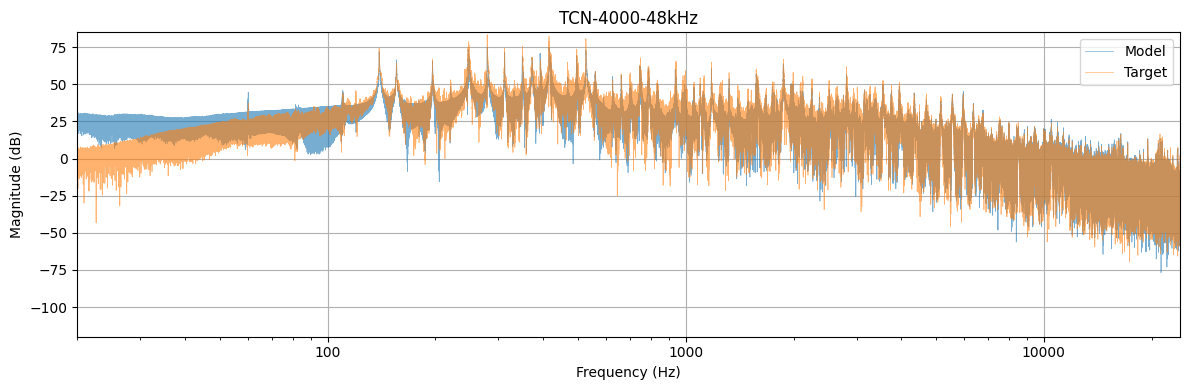

In [55]:
title = "TCN-4000-48kHz"

o_tcn, _ = torchaudio.load("results/48k/test/tcn-4000_20230826-212531_20230828_221023/out_tcn-4000.wav")
t_tcn, _ = torchaudio.load("results/48k/test/tcn-4000_20230826-212531_20230828_221023/tgt_tcn-4000.wav")

o = o_tcn.numpy().squeeze()
t = t_tcn.numpy().squeeze()


overlap_waveforms(o, t, sample_rate, start, end, title)
two_spectrograms_difference(o, t, sample_rate, title, zoom_spec)

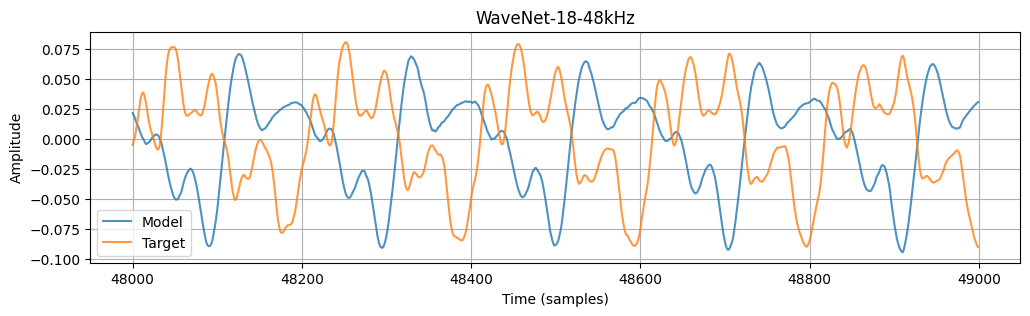

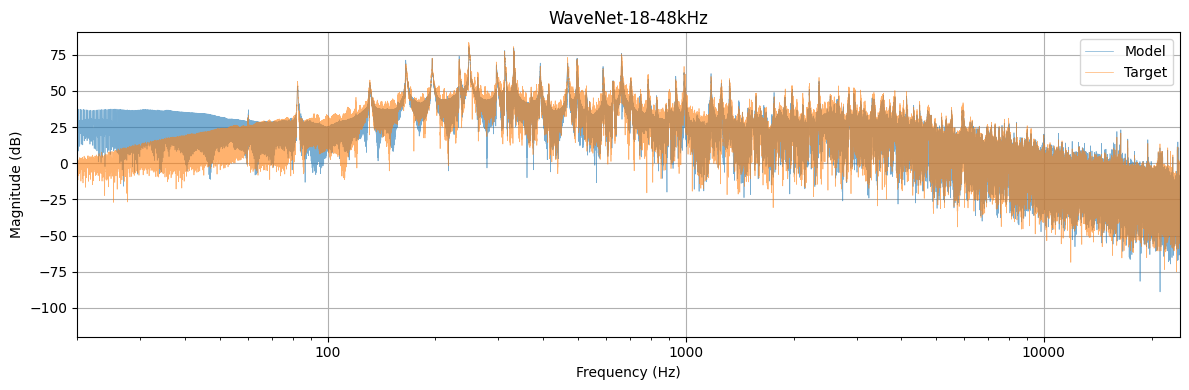

In [56]:
title = "WaveNet-18-48kHz"

o_p, sample_rate = torchaudio.load("results/48k/test/wavenet-18_20230825-112323_20230828_222730/out_wavenet-18.wav")
t_p, t_sr = torchaudio.load("results/48k/test/wavenet-18_20230825-112323_20230828_222730/tgt_wavenet-18.wav")

o = o_p.numpy().squeeze()
t = t_p.numpy().squeeze()

overlap_waveforms(o, t, sample_rate, start, end, title)
two_spectrograms_difference(o, t, sample_rate, title, zoom_spec)